In [0]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open("/content/drive/My Drive/stemming-assignment.txt","r") as file:
    D = file.read()

In [0]:
words = D.split("\n")

In [4]:
len(words)

23532

In [0]:
power_of_half = [pow(0.5,x) for x in range(50)]

In [0]:
def d1(s1,s2):
    d = 0
    if (len(s2) < len(s1)):
        s1, s2 = s2, s1
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            d = d + power_of_half[i]
    for i in range(len(s2)-len(s1)):
        d = d + power_of_half[len(s1)+i]
    return d

In [0]:
def d2(s1,s2):
    d = 0
    d2 = 0 
    d3 = 0
    d4 = 0
    m = 0
    if (len(s2) < len(s1)):
        s1, s2 = s2, s1
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            m = i
            break
    for i in range(len(s2)-m):
        d = d + power_of_half[i]
    if m != 0:
      d2 = d/m
      d3 = (len(s2)-m)*d/m
      d4 = (len(s2)-m)*d/(len(s2))
    else:
      d2 = math.inf
      d3 = math.inf
      d4 = math.inf
    return (d2,d3,d4)

In [0]:
def dist(distance_,words):
    dis = np.zeros((len(words),len(words)))
    for x in range(len(words)):
        for y in range(x,len(words)):
     
            if distance_ == 'd0':
                dis[x][y] = levenshtein(words[x],words[y])
            elif distance_ == 'd1':
                dis[x][y] = d1(words[x],words[y])
            dis[y][x] = dis[x][y]
    return dis

In [0]:
dis1 = dist("d1",words)

In [0]:
import pickle
with open("/content/drive/My Drive/dist1", 'wb') as f:
    pickle.dump(dis1,f, protocol=4)

In [0]:
def dist1(words):  
  dis2 = np.zeros((len(words),len(words)))
  dis3 = np.zeros((len(words),len(words)))
  dis4 = np.zeros((len(words),len(words)))
  for x in range(len(words)):
    for y in range(x,len(words)):
       dis2[x][y],dis3[x][y],dis4[x][y] = d2(words[x],words[y])
  return (dis2,dis3,dis4)

In [0]:
dis2,dis3,dis4 = dist1(words)

In [0]:
import pickle
with open("/content/drive/My Drive/dist2", 'wb') as f:
    pickle.dump(dis2,f, protocol=4)

In [0]:
import pickle
with open("/content/drive/My Drive/dist3", 'wb') as f:
    pickle.dump(dis3,f, protocol=4)

In [0]:
import pickle
with open("/content/drive/My Drive/dist4", 'wb') as f:
    pickle.dump(dis4,f, protocol=4)

In [0]:
threshold = np.arange(np.min(dis1),np.max(dis1),(np.max(dis1)-np.min(dis1))/50)

In [11]:
nos_of_clusters = []
for x in threshold:
    print(x)
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', memory=None, connectivity=None, compute_full_tree='true',linkage='complete', distance_threshold=x)
    y = clustering.fit_predict(dis1)
    nos_of_clusters.append(np.max(y))

0.0
0.03999999970197678
0.07999999940395355
0.11999999910593033
0.1599999988079071
0.19999999850988387
0.23999999821186066
0.27999999791383745
0.3199999976158142
0.359999997317791
0.39999999701976774
0.43999999672174456
0.4799999964237213
0.5199999961256981
0.5599999958276749
0.5999999955296517
0.6399999952316284
0.6799999949336052
0.719999994635582
0.7599999943375587
0.7999999940395355
0.8399999937415124
0.8799999934434891
0.9199999931454659
0.9599999928474426
0.9999999925494194
1.0399999922513963
1.079999991953373
1.1199999916553498
1.1599999913573265
1.1999999910593033
1.23999999076128
1.2799999904632569
1.3199999901652337
1.3599999898672104
1.3999999895691873
1.439999989271164
1.4799999889731408
1.5199999886751174
1.5599999883770943
1.599999988079071
1.6399999877810478
1.6799999874830247
1.7199999871850014
1.7599999868869782
1.7999999865889549
1.8399999862909318
1.8799999859929084
1.9199999856948853
1.9599999853968622


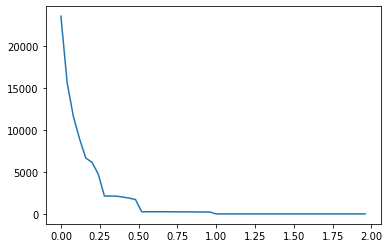

In [12]:
plt.plot(threshold,nos_of_clusters)

In [0]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', memory=None, connectivity=None, compute_full_tree='true',linkage='complete', distance_threshold=0.51)
y = clustering.fit_predict(dis1)
clusters,cluster_counts = np.unique(y,return_counts= True)

In [0]:
dic = {}
stems = []
i = 0
for x in clusters:
    l = []
    for i in range(len(y)):
        if y[i] == x:
            l.append(words[i])
    l.sort(key = len)
    stems.append(l[0])
    dic[x] = l
        
dic1 = {}
for key,value in dic.items():
    for x in value:
        dic1[x] = key

In [0]:
stemmer = PorterStemmer()

In [0]:
counter = 0
for word in words:
    if stems[dic1[word]] == stemmer.stem(word):
        #print(stems[dic1[word]])
        #print(stemmer.stem(word))
        counter = counter + 1

In [0]:
Eff = counter/len(words)

In [23]:
counter

370